In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import numpy as np

In [ ]:
df=pd.read_csv("/content/Customer_Order.csv",sep=';')

In [ ]:
df['creationDate'] = pd.to_datetime(df['creationDate'], format="%d/%m/%Y %H:%M")
df

,codCustomer,orderNumber,orderToCollect,Reference,Size (US),quantity (units),creationDate,waveNumber,operator
0,C0000016,124438,8,8N10W9,9.0,6,2023-10-19 07:18:00,43175,Operator_1
1,C0000016,124438,7,2T1DJM,13.0,1,2023-10-19 07:18:00,43175,Operator_1
2,C0000016,124438,6,QVFB0Q,105.0,1,2023-10-19 07:18:00,43175,Operator_1
3,C0000016,124438,5,W25EZN,13.0,1,2023-10-19 07:18:00,43175,Operator_1
4,C0000016,124438,4,W25EZN,11.0,1,2023-10-19 07:18:00,43175,Operator_1
...,...,...,...,...,...,...,...,...,...
122365,C0000747,89481,1,5HQR89,105.0,1,2023-01-05 07:42:00,33168,Operator_2
122366,C0000747,89480,1,8E9F1P,105.0,1,2023-01-05 07:42:00,33169,Operator_8
122367,C0000747,89479,1,56TC1Z,6.0,1,2023-01-05 07:42:00,33168,Operator_2
122368,C0000747,89478,1,6M2FJM,12.0,1,2023-01-05 07:42:00,33168,Operator_2


In [ ]:
for i in df['Reference'].value_counts():
  print(i)

10267
5375
4834
3867
3385
3109
2800
2769
2703
2662
2524
2374
2329
2294
2249
2209
2115
1996
1994
1949
1926
1905
1773
1665
1607
1601
1584
1515
1417
1348
1348
1253
1245
1198
1190
1115
1111
1059
983
973
934
895
835
782
753
712
648
622
612
595
593
589
526
521
521
520
506
496
467
459
446
415
404
392
388
381
380
373
365
351
342
342
341
340
325
313
307
306
297
293
287
286
276
275
261
261
241
231
229
226
226
225
216
214
211
211
203
199
194
184
181
180
173
165
163
159
157
156
156
156
150
145
142
140
135
133
133
131
130
128
120
117
111
108
107
106
104
96
93
91
83
83
82
78
78
74
73
71
70
69
65
63
62
60
58
57
57
56
55
54
47
47
46
41
41
37
35
33
31
31
31
30
30
29
28
28
26
25
24
23
22
21
21
20
19
19
17
16
15
15
15
14
13
13
12
8
8
7
7
7
6
5
4
3
3
3
3
3
2
1
1
1
1
1
1
1
1
1


In [ ]:
import pandas as pd

freq = df['Reference'].value_counts()
selected_refs = freq[freq >= 2500].index  # or ABC selection logic
df_filtered = df[df['Reference'].isin(selected_refs)]

In [ ]:
# Assuming 'filtered_df' is your top 50 products dataframe
# and 'creationDate' is a datetime column

jan_filtered_df = df_filtered[df_filtered['creationDate'].dt.month == 6]


In [ ]:
jan_filtered_df['Reference'].value_counts()

,count
Reference,
PY5UPB,1144
8N10W9,925
WRRW1W,551
SMMRK3,422
I1KDJ0,391
KTDZY0,359
8D9SAW,339
KUFVRI,325
2T1DJM,307


In [ ]:
import pandas as pd

# Step 1: Value counts on 'Reference' in Jan data
jan_filtered_freq = jan_filtered_df['Reference'].value_counts()

# Step 2: Select references with count >= 30
selected_refs = jan_filtered_freq[jan_filtered_freq >= 30].index

# Step 3: Filter the original jan_filtered_df to keep only selected references
jan_data = jan_filtered_df[jan_filtered_df['Reference'].isin(selected_refs)]


In [ ]:
jan_data['Reference'].value_counts()

,count
Reference,
PY5UPB,1144
8N10W9,925
WRRW1W,551
SMMRK3,422
I1KDJ0,391
KTDZY0,359
8D9SAW,339
KUFVRI,325
2T1DJM,307


In [ ]:
jan_data

,codCustomer,orderNumber,orderToCollect,Reference,Size (US),quantity (units),creationDate,waveNumber,operator
44015,C0000555,111476,31,PY5UPB,290.0,5,2023-06-30 11:33:00,39737,Operator_4
44016,C0000555,111476,31,PY5UPB,290.0,5,2023-06-30 11:33:00,39737,Operator_4
44017,C0000555,111476,31,PY5UPB,290.0,5,2023-06-30 11:33:00,39737,Operator_4
44018,C0000555,111476,30,PY5UPB,280.0,5,2023-06-30 11:33:00,39737,Operator_4
44019,C0000555,111476,30,PY5UPB,280.0,5,2023-06-30 11:33:00,39736,Operator_1
...,...,...,...,...,...,...,...,...,...
55871,C0000010,108395,3,8D9SAW,105.0,1,2023-06-01 11:29:00,38574,Operator_17
55873,C0000010,108395,1,I1KDJ0,9.0,1,2023-06-01 11:29:00,38574,Operator_17
55876,C0000008,108392,1,6M2FJM,9.0,2,2023-06-01 11:29:00,38574,Operator_17
55887,C0000747,108381,1,8N10W9,6.0,1,2023-06-01 11:29:00,38573,Operator_2


In [ ]:
# jan_data_p1 = jan_data.loc[jan_data['Reference'] == 'PY5UPB']#Constant orders on Monday Friday Wednesday
# jan_data_p1 = jan_data.loc[jan_data['Reference'] == 'KUFVRI']#Constant orders on Monday Tuesday Wednesday
jan_data_p1 = jan_data.loc[jan_data['Reference'] == '6M2FJM']#Rest need to model some distribution take mean over 30mins or 1hr interval avg over all mondays,tuesdays...divided by sub interval length


In [ ]:
df=jan_data_p1

In [ ]:
jan_data_p1

,codCustomer,orderNumber,orderToCollect,Reference,Size (US),quantity (units),creationDate,waveNumber,operator
44400,C0000721,111474,1,6M2FJM,11.0,1,2023-06-29 11:11:00,39660,Operator_3
44405,C0000640,111469,1,6M2FJM,105.0,3,2023-06-29 11:11:00,39660,Operator_3
44408,C0000621,111466,1,6M2FJM,11.0,4,2023-06-29 11:11:00,39660,Operator_3
44410,C0000552,111464,1,6M2FJM,105.0,1,2023-06-29 11:11:00,39660,Operator_3
44411,C0000552,111463,2,6M2FJM,11.0,1,2023-06-29 11:11:00,39660,Operator_3
...,...,...,...,...,...,...,...,...,...
55563,C0000487,108494,1,6M2FJM,10.0,1,2023-06-01 16:28:00,38662,Operator_1
55608,C0000223,108470,1,6M2FJM,9.0,2,2023-06-01 16:28:00,38660,Operator_1
55756,C0000008,108443,1,6M2FJM,9.0,2,2023-06-01 16:25:00,38651,Operator_6
55837,C0000223,108403,1,6M2FJM,9.0,2,2023-06-01 11:30:00,38576,Operator_1


<ipython-input-32-dfc58bea87c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['creationDate'].dt.date


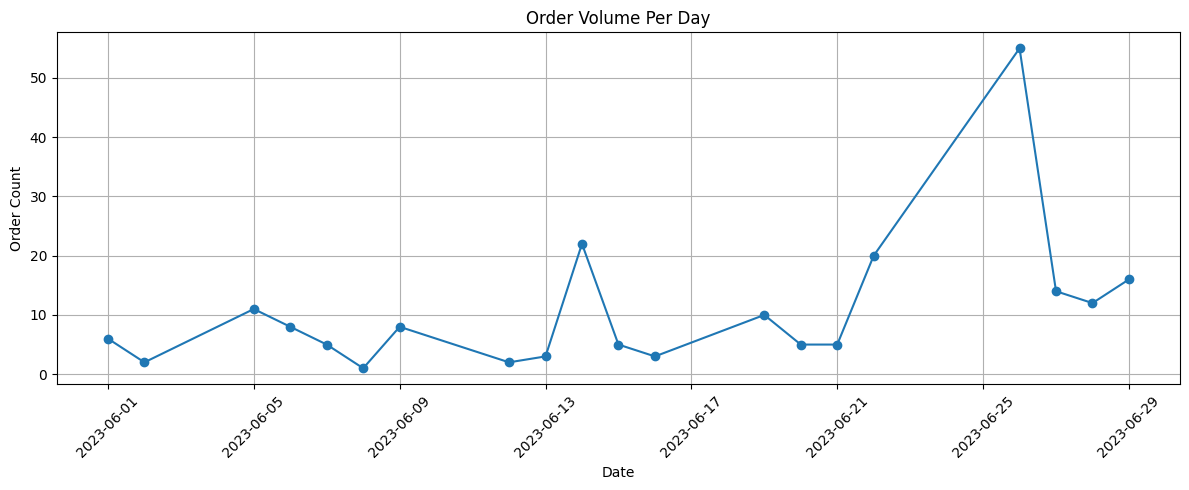

In [ ]:
df['date'] = df['creationDate'].dt.date
daily_counts = df.groupby('date').size()

plt.figure(figsize=(12, 5))
daily_counts.plot(marker='o')
plt.title("Order Volume Per Day")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-15-a867efbda7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['creationDate'].dt.day_name()
<ipython-input-15-a867efbda7f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['creationDate'].dt.hour


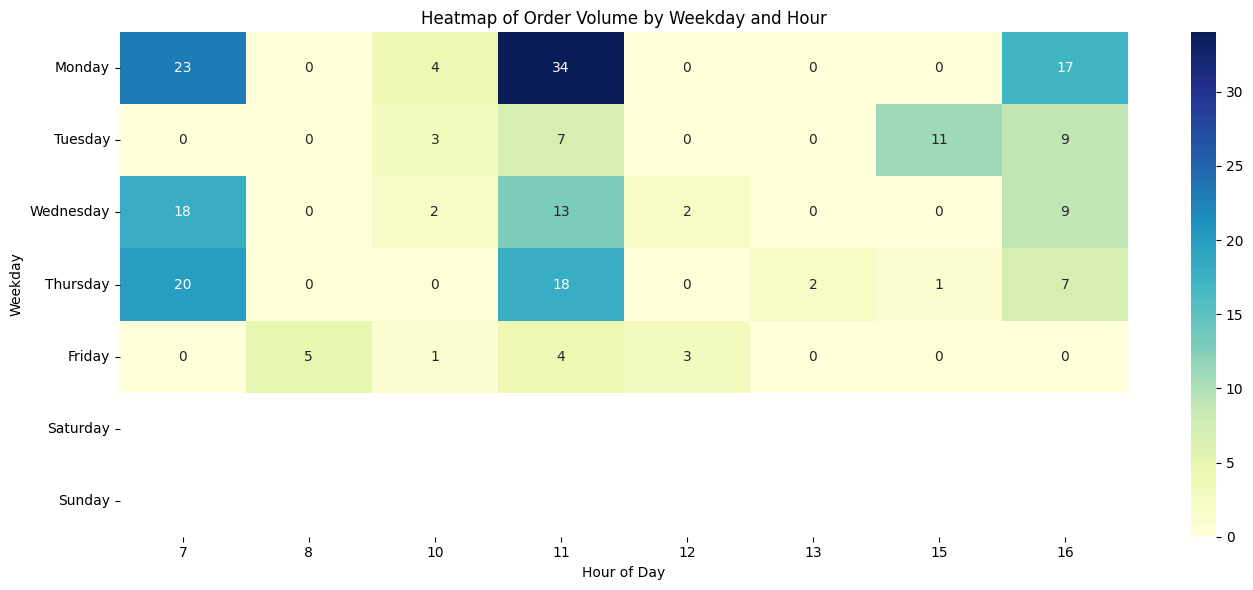

In [ ]:
 df['weekday'] = df['creationDate'].dt.day_name()
df['hour'] = df['creationDate'].dt.hour
heatmap_data = df.groupby(['weekday', 'hour']).size().unstack().fillna(0)

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Heatmap of Order Volume by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()


Hourly arrival rates by product, weekday, and hour:
     weekday  hour  arrivals  arrival_rate Reference
0     Friday    11       384         96.00    PY5UPB
1     Monday    19       376         94.00    PY5UPB
2  Wednesday    16       384         96.00    PY5UPB
0     Friday     8        37          9.25    8N10W9
1     Friday    10         3          0.75    8N10W9
2     Friday    11        18          4.50    8N10W9
3     Friday    12        10          2.50    8N10W9
4     Monday     7        33          8.25    8N10W9
5     Monday    10        99         24.75    8N10W9
6     Monday    11        81         20.25    8N10W9


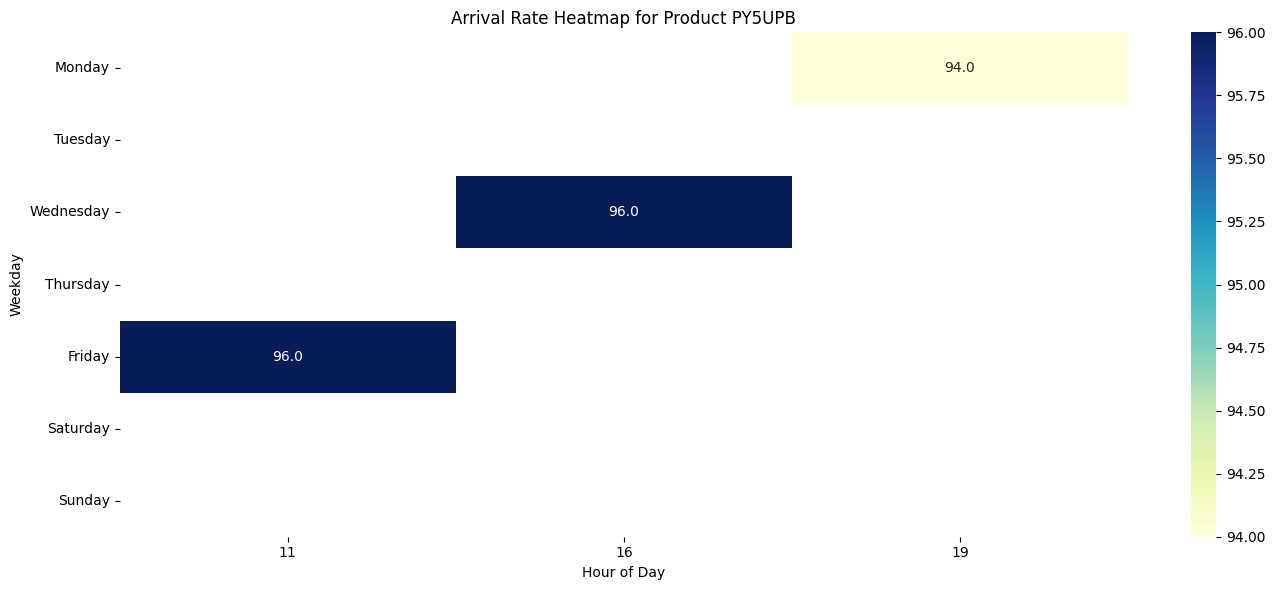

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming jan_data is already loaded with creationDate and product columns
# Ensure creationDate is in datetime format
jan_data['creationDate'] = pd.to_datetime(jan_data['creationDate'])

# Extract weekday and hour information
jan_data['weekday'] = jan_data['creationDate'].dt.day_name()
jan_data['hour'] = jan_data['creationDate'].dt.hour

# Calculate number of unique days for each weekday to use as denominator
weekday_counts = jan_data.groupby('weekday')['creationDate'].apply(
    lambda x: len(x.dt.date.unique())
).to_dict()

# Calculate arrival rates for each product by weekday and hour
product_hourly_rates = []

# Process each product in the reference list
products = ['PY5UPB', '8N10W9', 'WRRW1W', 'SMMRK3', 'I1KDJ0',
            'KTDZY0', '8D9SAW', 'KUFVRI', '2T1DJM', 'XUZJ74', '6M2FJM']

for product_id in products:
    # Filter data for this product
    product_data = jan_data[jan_data['Reference'] == product_id]

    # Group by weekday and hour
    arrival_counts = product_data.groupby(['weekday', 'hour']).size().reset_index(name='arrivals')

    # Calculate arrival rate (arrivals per hour)
    arrival_counts['arrival_rate'] = arrival_counts.apply(
        lambda row: row['arrivals'] / weekday_counts.get(row['weekday'], 1), axis=1
    )

    # Add product info
    arrival_counts['Reference'] = product_id

    product_hourly_rates.append(arrival_counts)

# Combine all products
all_product_rates = pd.concat(product_hourly_rates)

# Create half-hour intervals if needed (similar to the table in images)
def create_half_hour_rates(df):
    half_hour_rates = []

    for product_id in products:
        product_df = df[df['Reference'] == product_id]

        for weekday in product_df['weekday'].unique():
            weekday_df = product_df[product_df['weekday'] == weekday]

            for hour in weekday_df['hour'].unique():
                rate = weekday_df[weekday_df['hour'] == hour]['arrival_rate'].values[0]

                # Split the hourly rate into two half-hour periods
                # This is a simple approach - could be refined with actual half-hour data
                half_hour_rates.append({
                    'product': product_id,
                    'weekday': weekday,
                    'time_period': f"{hour:02d}:00-{hour:02d}:30",
                    'arrival_rate': rate / 2  # Assuming even distribution
                })

                half_hour_rates.append({
                    'product': product_id,
                    'weekday': weekday,
                    'time_period': f"{hour:02d}:30-{(hour+1):02d}:00",
                    'arrival_rate': rate / 2  # Assuming even distribution
                })

    return pd.DataFrame(half_hour_rates)

# Create half-hour rates (optional)
half_hour_product_rates = create_half_hour_rates(all_product_rates)

# Display results
print("Hourly arrival rates by product, weekday, and hour:")
print(all_product_rates.head(10))

# Example: Create a heatmap for a specific product
def plot_product_heatmap(product_id):
    product_data = all_product_rates[all_product_rates['Reference'] == product_id]

    # Prepare data for heatmap
    heatmap_data = product_data.pivot(index='weekday', columns='hour', values='arrival_rate')

    # Reorder weekdays
    ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data.reindex(ordered_days)

    # Plot heatmap
    plt.figure(figsize=(14, 6))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
    plt.title(f"Arrival Rate Heatmap for Product {product_id}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Weekday")
    plt.tight_layout()
    plt.show()

# Example usage: Plot heatmap for first product
plot_product_heatmap(products[0])


In [ ]:


# First, ensure you've combined the list into a single DataFrame
all_product_rates = pd.concat(product_hourly_rates)

# Then save the combined DataFrame to CSV
all_product_rates.to_csv("product_hourly_rates_June_Ten_Frequent.csv", index=False)


In [ ]:
all_product_rates['Reference'].value_counts()

,count
Reference,
6M2FJM,22
WRRW1W,21
8N10W9,21
KTDZY0,21
I1KDJ0,21
2T1DJM,20
8D9SAW,19
SMMRK3,19
XUZJ74,18


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

# First, get all distributions that can be fitted
def get_fittable_distributions():
    """Get all continuous distributions from scipy.stats that have a .fit method"""
    all_objects = dir(scipy.stats)
    distributions = []
    for obj_name in all_objects:
        obj = getattr(scipy.stats, obj_name)
        # Check if it's a distribution with a fit method
        if hasattr(obj, 'fit') and callable(obj.fit):
            distributions.append(obj_name)
    return distributions

# Updated MyFit function with error handling
def MyFit(dataseries, distribution_name):
    try:
        # Get distribution details from scipy
        distribution = getattr(scipy.stats, distribution_name)

        # Check if this distribution has a fit method
        if not hasattr(distribution, 'fit'):
            print(f"{distribution_name} doesn't have a fit method. Skipping.")
            return None

        # Do MLE using the predefined .fit() function to find parameter values
        param = distribution.fit(dataseries)
        print('Fitted: ', distribution_name, ' with parameters ', param)

        # Do KS TEST using predefined kstest() function from scipy.stats package
        D, pval = scipy.stats.kstest(dataseries, distribution_name, args=param)

        print('\nKS Test')
        print('KS Test Statistics: ', D)
        if pval > 0.05:
            print('p-value is ', pval, '. Do not reject null hypothesis')
        else:
            print('p-value is ', pval, '. Reject null hypothesis')

        # Create dictionary to store results
        results = {
            'distribution': distribution_name,
            'parameters': param,
            'ks_statistic': D,
            'ks_pvalue': pval,
            'reject_null_ks': pval <= 0.05
        }

        # Do ANDERSONDARLING TEST using anderson() function from scipy.stats package.
        # Works only for a few distributions
        print('\n\nAnderson-Darling Test')
        possibledist = ['norm', 'expon', 'logistic', 'gumbel_l', 'gumbel_r']

        if distribution_name in possibledist:
            try:
                A, c_val, pvalA = scipy.stats.anderson(dataseries, distribution_name)
                print("Statistics", A, "; criticalValues: ", c_val, "; significanceLevel: ", pvalA)

                if all(i < A for i in c_val):
                    print('Test Statistics ', A, ' is more than all critical values. Reject H0')
                    ad_reject = True
                else:
                    print('Test Statistics ', A, ' is less than some critical values. Cannot Reject H0')
                    ad_reject = False

                # Add Anderson-Darling results to results dictionary
                results['ad_statistic'] = A
                results['ad_critical_values'] = c_val
                results['ad_significance_levels'] = pvalA
                results['reject_null_ad'] = ad_reject
            except Exception as e:
                print(f"Error in Anderson-Darling test: {e}")
                results['ad_test_performed'] = False
        else:
            print('The given distribution cannot be tested with A-D test.')
            results['ad_test_performed'] = False

        # PLOT DATA AS HISTOGRAM along with the theoretical curve
        plt.figure(figsize=(10, 5))
        plt.hist(dataseries, bins=int(len(dataseries)/2), density=True, alpha=0.8, color='g')
        xmin, xmax = plt.xlim()

        x = np.linspace(xmin, xmax, 100)
        try:
            prob = distribution.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
            plt.plot(x, prob, label=distribution_name)
            plt.legend(loc='upper right')
            plt.grid(alpha=0.3)
            plt.xlabel('Inter-arrival Time (minutes)')
            plt.ylabel('Probability Density')
            plt.title(f'{distribution_name.capitalize()} Distribution Fit (KS p-value: {pval:.4f})')
            plt.show()
        except Exception as e:
            print(f"Error plotting PDF: {e}")

        return results
    except Exception as e:
        print(f"Error processing distribution {distribution_name}: {e}")
        return None


In [ ]:
# prompt: df['creationDate'] filter on date 01-05 only

# Filter df['creationDate'] for the date 01-05 (May 1st)
df_d1 = df[df['creationDate'].dt.strftime('%m-%d') == '06-07']
df_d1


,codCustomer,orderNumber,orderToCollect,Reference,Size (US),quantity (units),creationDate,waveNumber,operator,date,weekday,hour
53133,C0000418,109104,17,XUZJ74,85.0,1,2023-06-07 16:11:00,38832,Operator_19,2023-06-07,Wednesday,16
53256,C0000186,109084,33,XUZJ74,12.0,1,2023-06-07 16:11:00,38822,Operator_19,2023-06-07,Wednesday,16
53257,C0000186,109084,32,XUZJ74,10.0,1,2023-06-07 16:11:00,38822,Operator_19,2023-06-07,Wednesday,16
53258,C0000186,109084,31,XUZJ74,9.0,1,2023-06-07 16:11:00,38822,Operator_19,2023-06-07,Wednesday,16
53259,C0000186,109084,30,XUZJ74,85.0,1,2023-06-07 16:11:00,38822,Operator_19,2023-06-07,Wednesday,16
53290,C0000186,109083,18,XUZJ74,10.0,1,2023-06-07 16:11:00,38820,Operator_1,2023-06-07,Wednesday,16
53291,C0000186,109083,17,XUZJ74,95.0,1,2023-06-07 16:11:00,38820,Operator_1,2023-06-07,Wednesday,16
53292,C0000186,109083,16,XUZJ74,9.0,2,2023-06-07 16:11:00,38820,Operator_1,2023-06-07,Wednesday,16
53511,C0000016,109040,12,XUZJ74,11.0,1,2023-06-07 10:42:00,38803,Operator_5,2023-06-07,Wednesday,10
53512,C0000016,109040,11,XUZJ74,105.0,2,2023-06-07 10:42:00,38803,Operator_5,2023-06-07,Wednesday,10




======= Testing expon distribution =======
Fitted:  expon  with parameters  (0.0, 25.307692307692307)

KS Test
KS Test Statistics:  0.9230769230769231
p-value is  6.603381910460181e-15 . Reject null hypothesis


Anderson-Darling Test
Statistics inf ; criticalValues:  [0.881 1.03  1.282 1.535 1.871] ; significanceLevel:  [15.  10.   5.   2.5  1. ]
Test Statistics  inf  is more than all critical values. Reject H0


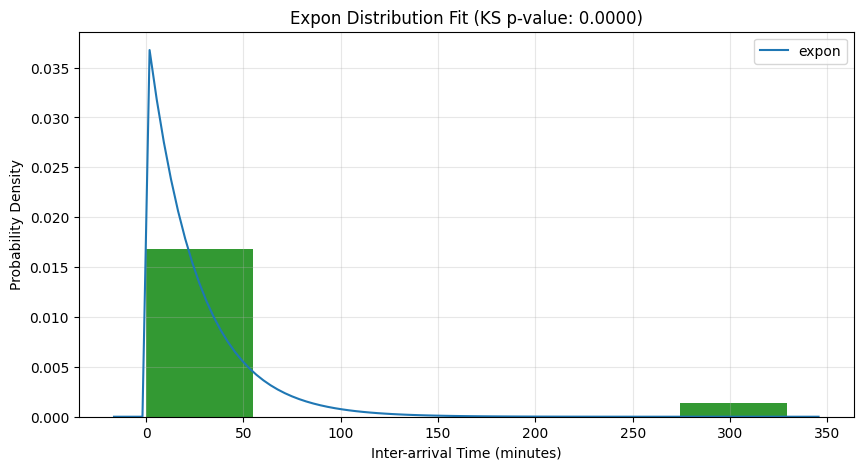



======= Testing gamma distribution =======
Fitted:  gamma  with parameters  (np.float64(0.6093862667865055), np.float64(-4.289896780244586e-27), np.float64(168.2683009869149))

KS Test
KS Test Statistics:  0.9230769230769231
p-value is  6.603381910460181e-15 . Reject null hypothesis


Anderson-Darling Test
The given distribution cannot be tested with A-D test.


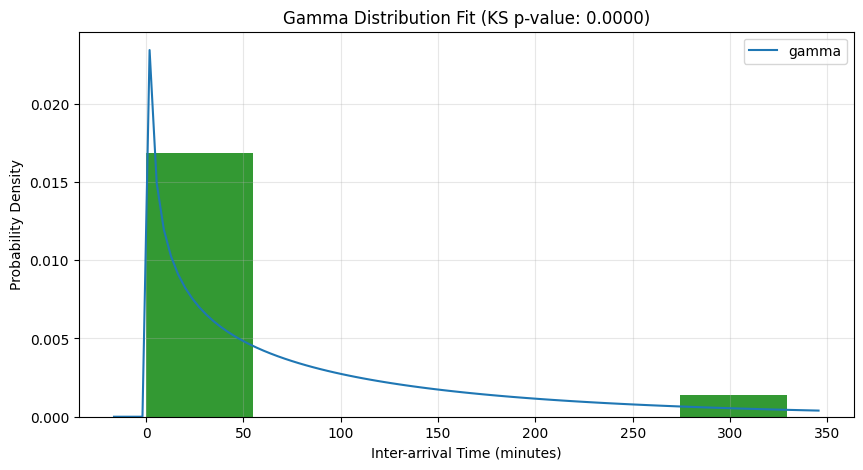



======= Testing weibull_min distribution =======
Fitted:  weibull_min  with parameters  (np.float64(0.4415472397596448), np.float64(-1.2349936888247217e-27), np.float64(116.65207124594899))

KS Test
KS Test Statistics:  0.9230769230767624
p-value is  6.603381910639586e-15 . Reject null hypothesis


Anderson-Darling Test
The given distribution cannot be tested with A-D test.


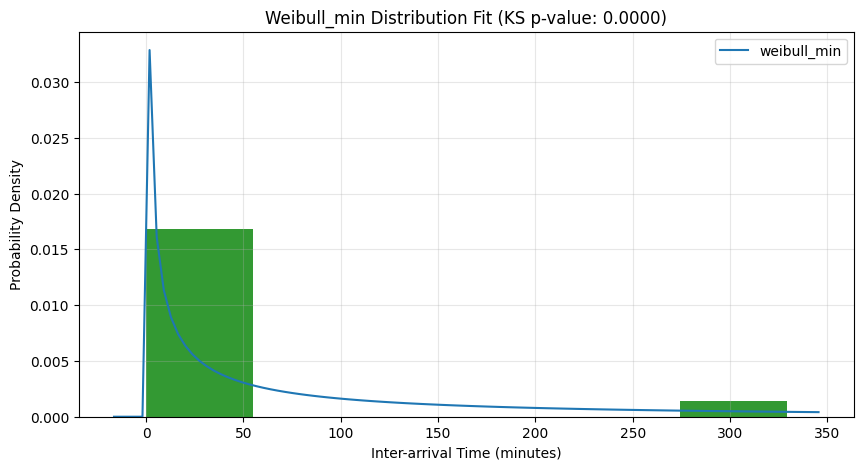



======= Testing lognorm distribution =======
Fitted:  lognorm  with parameters  (np.float64(199.91493757938315), np.float64(-5e-324), np.float64(5.716418066453476e-299))

KS Test
KS Test Statistics:  0.5366619267346995
p-value is  0.0004995437014434428 . Reject null hypothesis


Anderson-Darling Test
The given distribution cannot be tested with A-D test.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:6626: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


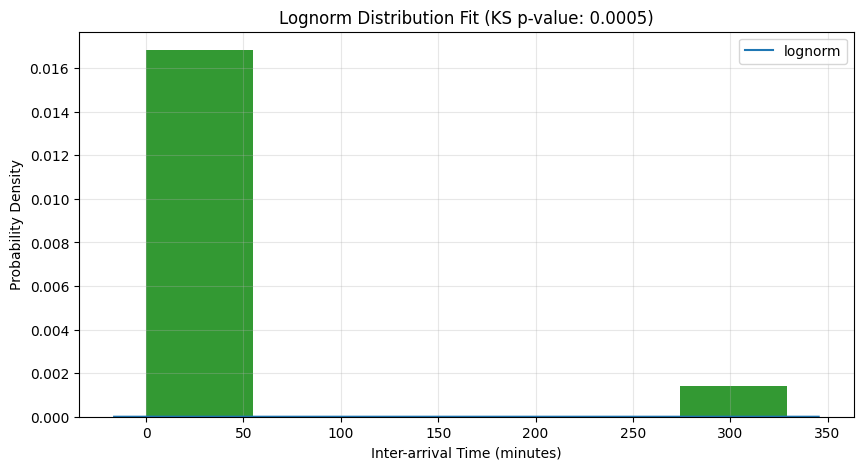


Summary of Distribution Tests:
  Distribution  KS Statistic    KS p-value  Reject Null
3      lognorm      0.536662  4.995437e-04         True
2  weibull_min      0.923077  6.603382e-15         True
1        gamma      0.923077  6.603382e-15         True
0        expon      0.923077  6.603382e-15         True


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

# Calculate inter-arrival times
df_d1 = df_d1.sort_values(by='creationDate')
df_d1['inter_arrival_time'] = df_d1['creationDate'].diff().dt.total_seconds() / 60
inter_arrival = df_d1['inter_arrival_time'].dropna()

# Test multiple distributions
distributions = ['expon', 'gamma', 'weibull_min', 'lognorm']
results = {}

for dist in distributions:
    print(f"\n\n======= Testing {dist} distribution =======")
    results[dist] = MyFit(inter_arrival, dist)

# Compare results
result_summary = pd.DataFrame({
    'Distribution': list(results.keys()),
    'KS Statistic': [results[d]['ks_statistic'] for d in results],
    'KS p-value': [results[d]['ks_pvalue'] for d in results],
    'Reject Null': [results[d]['reject_null_ks'] for d in results]
})

print("\nSummary of Distribution Tests:")
print(result_summary.sort_values('KS p-value', ascending=False))


In [ ]:

# Assuming df['creationDate'] already converted to datetime
df_d1['hour'] = df_d1['creationDate'].dt.hour

hourly_counts = df_d1.groupby('hour').size()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title("Order Counts Per Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


<ipython-input-121-59ed0f5db6ce>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrival_counts = df_arrivals.groupby('time_bin').size().reindex(bins[:-1], fill_value=0)
<ipython-input-121-59ed0f5db6ce>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrival_counts.index, y=arrival_counts.values, palette='viridis')


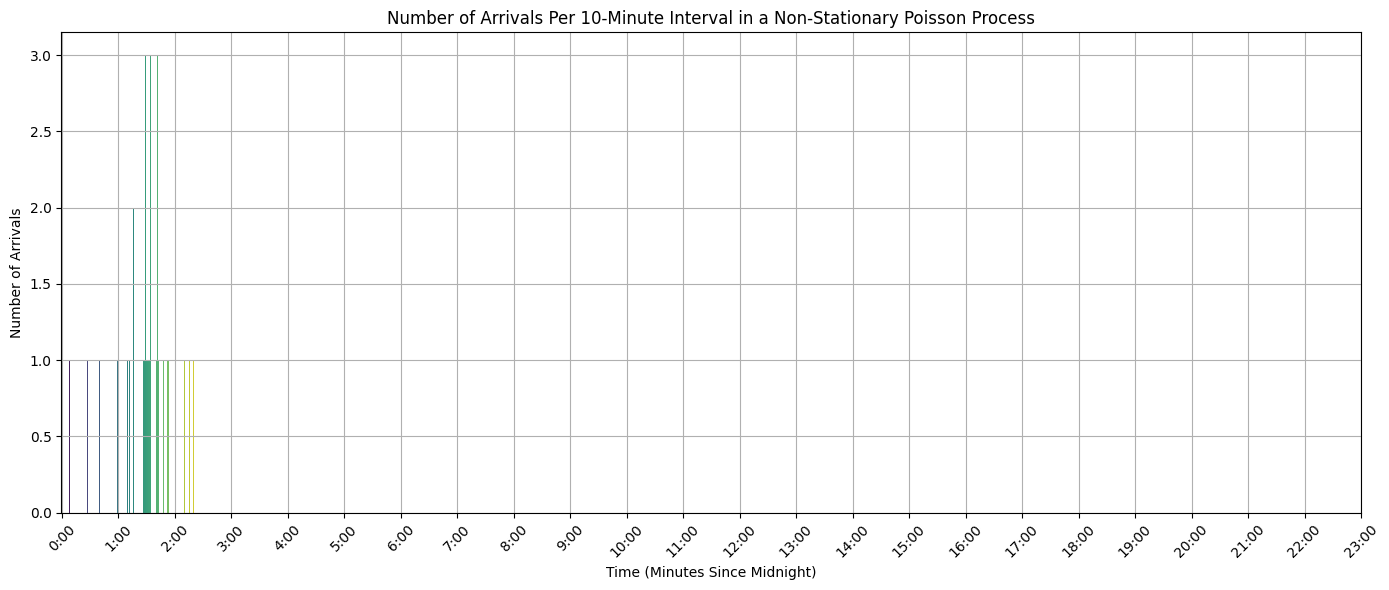

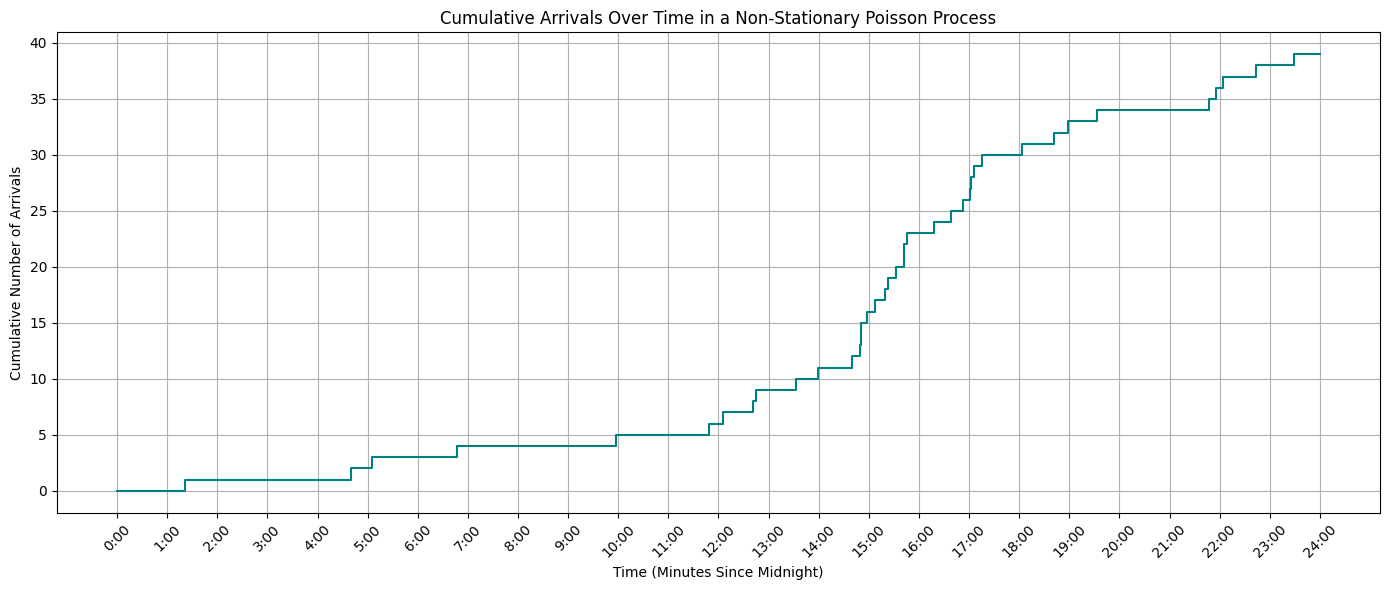

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define the time-varying rate function λ(t) for a 24-hour day (in minutes)
def lambda_t(t):
    # t is in minutes (0 to 1440 for a day)
    # Example: Higher rate in afternoon (e.g., around 16:00 = 960 minutes)
    base_rate = 0.01  # Baseline rate (arrivals per minute)
    peak_rate = 0.1   # Peak rate during busy hours
    # Gaussian-like peak around 16:00 (960 minutes)
    return base_rate + peak_rate * np.exp(-((t - 960)**2) / (2 * 120**2))

# Simulate non-stationary Poisson process using thinning algorithm
def simulate_nonstationary_poisson(lambda_func, T=1440):
    # T is total time in minutes (1440 = 24 hours)
    lambda_max = max(lambda_func(np.linspace(0, T, 1000)))  # Upper bound for λ(t)
    t = 0
    arrivals = []

    while t < T:
        # Generate candidate arrival time
        t += np.random.exponential(1 / lambda_max)
        if t >= T:
            break
        # Accept with probability λ(t)/λ_max
        if np.random.uniform(0, 1) < lambda_func(t) / lambda_max:
            arrivals.append(t)

    return np.array(arrivals)

# Simulate arrivals for one day
T = 1440  # 24 hours in minutes
arrival_times = simulate_nonstationary_poisson(lambda_t, T)

# Create a DataFrame with arrival times
df_arrivals = pd.DataFrame({'time_minutes': arrival_times})

# Bin arrivals into 10-minute intervals for plotting
bins = np.arange(0, T + 10, 10)  # 10-minute bins
df_arrivals['time_bin'] = pd.cut(df_arrivals['time_minutes'], bins=bins, labels=bins[:-1], include_lowest=True)
arrival_counts = df_arrivals.groupby('time_bin').size().reindex(bins[:-1], fill_value=0)

# Plot arrivals per 10-minute interval
plt.figure(figsize=(14, 6))
sns.barplot(x=arrival_counts.index, y=arrival_counts.values, palette='viridis')
plt.title("Number of Arrivals Per 10-Minute Interval in a Non-Stationary Poisson Process")
plt.xlabel("Time (Minutes Since Midnight)")
plt.ylabel("Number of Arrivals")
plt.grid(True)
plt.xticks(np.arange(0, T, 60), labels=[f"{int(t//60)}:00" for t in np.arange(0, T, 60)], rotation=45)
plt.tight_layout()
plt.show()

# Optional: Plot cumulative arrivals
plt.figure(figsize=(14, 6))
plt.step(np.concatenate([[0], arrival_times, [T]]),
         np.concatenate([[0], np.arange(1, len(arrival_times) + 1), [len(arrival_times)]]),
         where='post', color='teal')
plt.title("Cumulative Arrivals Over Time in a Non-Stationary Poisson Process")
plt.xlabel("Time (Minutes Since Midnight)")
plt.ylabel("Cumulative Number of Arrivals")
plt.grid(True)
plt.xticks(np.arange(0, T + 1, 60), labels=[f"{int(t//60)}:00" for t in np.arange(0, T + 1, 60)], rotation=45)
plt.tight_layout()
plt.show()

These three plots give **excellent clarity** for understanding the dynamics of your warehouse's order arrivals and are great for informing your **Discrete Event Simulation (DES)** model in AnyLogic. Here's a breakdown of each with insights and how they can help structure your simulation:

---

### 📊 **1. Order Counts Per Hour of the Day (Barplot)**

**Insight:**
- Massive spike at **7 AM**, which likely corresponds to a **batch job or scheduled order upload**.
- Steady flow from **10 AM to 4 PM**, with smaller peaks around 11 AM and 3-4 PM.
- Minimal activity before 7 AM and after 5 PM.

**Simulation Implication:**
- You should **model a burst arrival** at 7 AM (possibly a bulk order drop).
- Between 10 AM to 4 PM, use a **time-varying Poisson process** or **non-homogeneous Poisson process** for arrivals.
- Outside active hours, arrival rates can be set close to zero or ignored.

---

### 📈 **2. Order Volume Per Day (Line Plot)**

**Insight:**
- Significant **fluctuations across days**, with some clear spikes.
- There's **weekly seasonality** visible — higher order counts on certain days.
- Possible data gaps or lower activity in mid-June and August.

**Simulation Implication:**
- **Use a date-dependent distribution** if you're modeling over long time periods.
- Consider **weekly cycles** with high volume days like Wednesday/Thursday and low volume on weekends.
- You may simulate a representative day (e.g., Wednesday vs. Sunday) if full-scale simulation is infeasible.

---

### 🔥 **3. Heatmap of Order Volume by Weekday and Hour**

**Insight:**
- **Wednesday and Thursday are peak days**, especially 7 AM and 10-11 AM.
- **Saturday is silent**. Sunday has sparse activity — aligns with a warehouse closed/low-staff schedule.
- Heatmap reveals **when operators are most loaded**, which can help in shift planning.

**Simulation Implication:**
- Your simulation model should:
  - Account for **day-of-week** and **hour-of-day** jointly.
  - Assign **higher arrival intensities for mid-week mornings**.
  - Possibly skip or modify the process for weekends.
- Use this to **parameterize arrival rates for each weekday-hour** combo.

---

### ✅ Recommendation for Next Step:

Since your goal is to **fit a distribution** for DES input:

1. **Bin creation timestamps by weekday & hour**.
2. **Estimate arrival rates** per bin (e.g., orders/hour).
3. Fit **Poisson or time-varying rate models**, possibly smoothed by kernel density or lowess.
4. Visualize the fitted distributions (QQ plot, histograms, KDE) to validate.

Let me know if you'd like help writing the Python code to do this next!


Goodness-of-Fit Test Results:
  Distribution  KS Statistic     KS p-value  AD Statistic
1         norm      0.325203   1.029283e-72    140.020870
3      lognorm      0.357597   2.666793e-88           NaN
2        gamma      0.589870  1.005940e-254           NaN
0        expon      0.602986  1.645316e-267   1358.801315


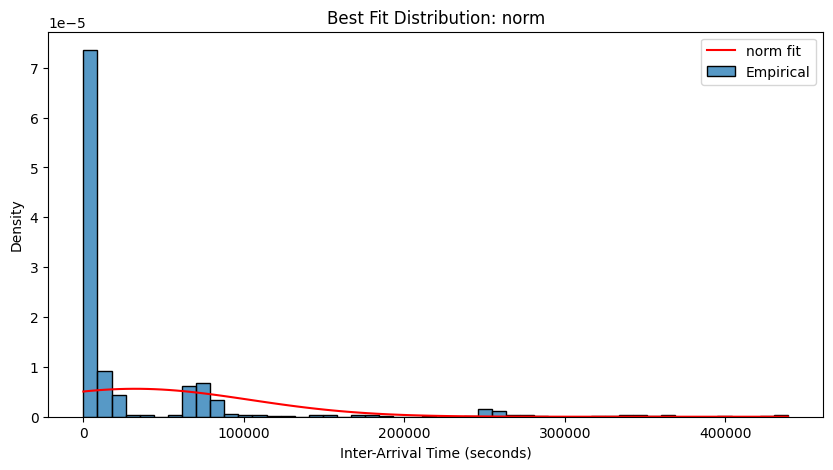

In [ ]:
# ===================================================
# 4. Goodness-of-Fit Tests on Inter-Arrival Times
# ===================================================
# Calculate inter-arrival times in seconds
df_sorted = df.sort_values('creationDate')
interarrival_times = df_sorted['creationDate'].diff().dt.total_seconds().dropna()
interarrival_times = interarrival_times[interarrival_times > 0]  # remove 0s if any

# Fit candidate distributions
candidates = ['expon', 'norm', 'gamma', 'lognorm']
results = []

for dist_name in candidates:
    dist = getattr(stats, dist_name)
    params = dist.fit(interarrival_times)

    # KS Test
    ks_stat, ks_p = stats.kstest(interarrival_times, dist_name, args=params)

    # Anderson-Darling Test (only for normal, expon, logistic by default)
    if dist_name in ['norm', 'expon']:
        ad_result = stats.anderson(interarrival_times, dist=dist_name)
        ad_stat = ad_result.statistic
    else:
        ad_stat = np.nan  # not available

    results.append({
        'Distribution': dist_name,
        'KS Statistic': ks_stat,
        'KS p-value': ks_p,
        'AD Statistic': ad_stat
    })

# Display test results
result_df = pd.DataFrame(results)
print("\nGoodness-of-Fit Test Results:")
print(result_df.sort_values('KS Statistic'))

# ===========================
# 5. Plot histogram + best fit
# ===========================
best_fit = result_df.sort_values('KS Statistic').iloc[0]['Distribution']
best_dist = getattr(stats, best_fit)
best_params = best_dist.fit(interarrival_times)

x = np.linspace(interarrival_times.min(), interarrival_times.max(), 100)
pdf_fitted = best_dist.pdf(x, *best_params)

plt.figure(figsize=(10,5))
sns.histplot(interarrival_times, bins=50, kde=False, stat='density', label='Empirical')
plt.plot(x, pdf_fitted, 'r-', label=f'{best_fit} fit')
plt.title(f"Best Fit Distribution: {best_fit}")
plt.xlabel("Inter-Arrival Time (seconds)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

def MyFit(dataseries, distribution_name):
    """
    Fits a distribution to the data and returns KS & AD statistics.
    """
    distribution = getattr(scipy.stats, distribution_name)
    param = distribution.fit(dataseries)

    # Kolmogorov–Smirnov test
    D, pval = scipy.stats.kstest(dataseries, distribution_name, args=param)

    # Anderson-Darling test (only for a few distributions)
    AD_stat = None
    possibledist = ['norm', 'expon', 'logistic', 'gumbel', 'gumbel_l', 'gumbel_r', 'extreme1']
    if distribution_name in possibledist:
        A, _, _ = scipy.stats.anderson(dataseries, distribution_name)
        AD_stat = A

    return {
        'distribution': distribution_name,
        'ks_stat': D,
        'ks_pval': pval,
        'ad_stat': AD_stat,
        'params': param
    }

def analyze_in_time_bins(data, bin_size, dist_list):
    """
    Performs distribution fitting in time bins.

    Parameters:
    - data: pandas DataFrame with 'timestamp' and 'value' columns
    - bin_size: bin size in seconds
    - dist_list: list of distribution names (strings) from scipy.stats

    Returns:
    - DataFrame with KS and AD results per bin and distribution
    """
    data = data.sort_values('timestamp')  # Ensure chronological order
    data['time_bin'] = ((data['timestamp'] - data['timestamp'].min()) / bin_size).astype(int)

    results = []

    for bin_id, group in data.groupby('time_bin'):
        print(f"\n📦 Time Bin {bin_id} | Count = {len(group)}")
        for dist in dist_list:
            try:
                res = MyFit(group['value'].values, dist)
                res['time_bin'] = bin_id
                results.append(res)
            except Exception as e:
                print(f"⚠️ Failed fitting {dist} in bin {bin_id}: {e}")

    return pd.DataFrame(results)


In [ ]:
# Simulated Example: Replace with your real data
np.random.seed(42)
timestamps = np.cumsum(np.random.exponential(scale=1.0, size=1000))  # e.g., arrival timestamps
values = np.random.exponential(scale=2.0, size=1000)                 # e.g., interarrival times

df = pd.DataFrame({
    'timestamp': timestamps,
    'value': values
})

# Analyze using 100-second bins and test these distributions
dist_list = ['expon', 'norm', 'lognorm', 'gamma']
fit_results_df = analyze_in_time_bins(df, bin_size=100, dist_list=dist_list)



📦 Time Bin 0 | Count = 112

📦 Time Bin 1 | Count = 105

📦 Time Bin 2 | Count = 90

📦 Time Bin 3 | Count = 104

📦 Time Bin 4 | Count = 88

📦 Time Bin 5 | Count = 78

📦 Time Bin 6 | Count = 128

📦 Time Bin 7 | Count = 98

📦 Time Bin 8 | Count = 115

📦 Time Bin 9 | Count = 82


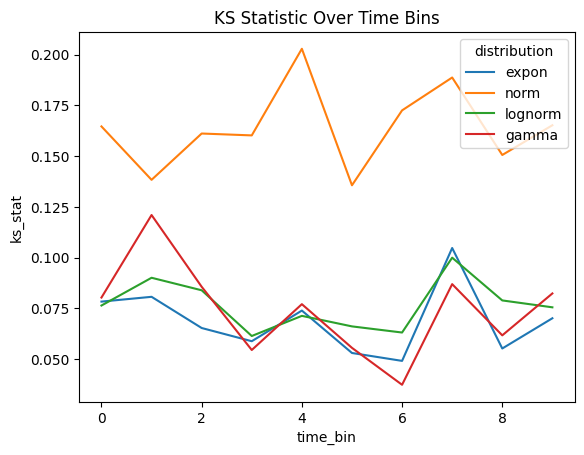

In [ ]:
import seaborn as sns

sns.lineplot(data=fit_results_df, x='time_bin', y='ks_stat', hue='distribution')
plt.title('KS Statistic Over Time Bins')
plt.show()


In [ ]:
df

,timestamp,value
0,0.469268,0.409461
1,3.479390,1.561340
2,4.796135,4.126284
3,5.709078,2.635216
4,5.878703,3.285588
...,...,...
995,966.275026,2.139788
996,968.767726,6.275266
997,968.914856,0.142902
998,971.915347,0.117494
